# Example Plots #

Demonstrations of **matplotlib** and **numpy**

See more plot types at [http://matplotlib.org/gallery.html]

## Polynomial Plot ##

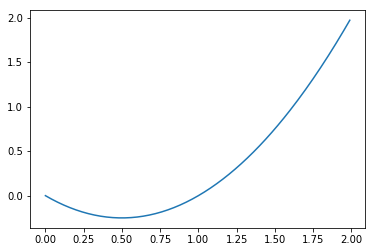

In [36]:
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np 

x = np.arange(0.0, 2.0, 0.01)
y = x**2 - x

plt.plot(x, y)
plt.show()

## Sine Wave with Plot Labels and Grid ##

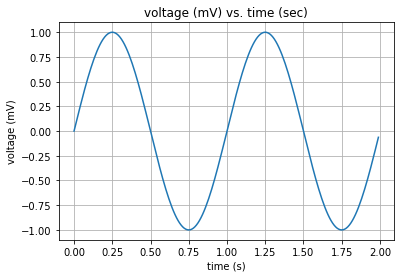

In [2]:
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np  

t = np.arange(0.0, 2.0, 0.01)  
s = np.sin(2*np.pi*t) 

plt.plot(t, s)  
plt.xlabel('time (s)')  
plt.ylabel('voltage (mV)')  
plt.title('voltage (mV) vs. time (sec)')   
plt.grid(True)  
plt.show() 

## Decaying Sine Wave with Labels ##

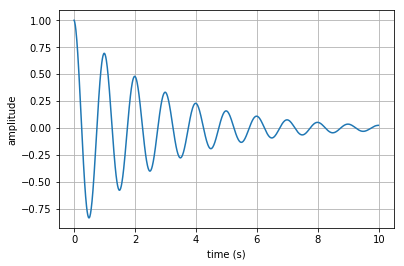

In [34]:
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np 

t = np.arange(0.0, 10.0, 0.01)
y = np.cos(2*np.pi*t) / np.e**(t/np.e) # * np.sin(t)

plt.xlabel('time (s)')  
plt.ylabel('amplitude')

plt.grid(True)  
plt.plot(t,y)
plt.show()

## Polar Plot ##

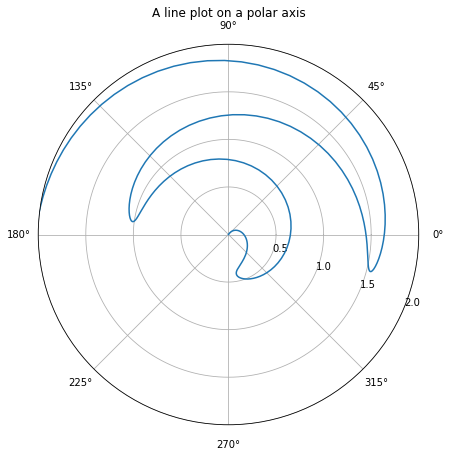

In [71]:
r = np.arange(0, 5, 0.01)

theta = np.pi * r/np.pi + np.cos(r*2*np.pi) - np.sin(r*1.5*np.pi)

plt.figure(figsize=(7,7)) # Set plot size

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

## Mandelbrot Plot ##

The Mandelbrot set rendering can be improved by using a normalized recount
associated with a power normalized colormap (gamma=0.3). Rendering can be
further enhanced thanks to shading.

The *maxiter* gives the precision of the computation. *maxiter=200* should
take a few seconds on most modern laptops.

See: [http://matplotlib.org/examples/showcase/mandelbrot.html]

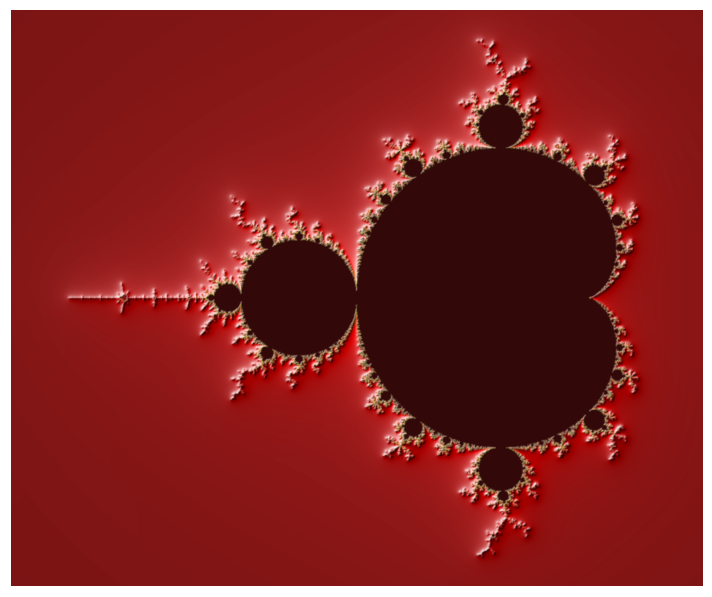

In [83]:
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np  

def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn, dtype=np.float32)
    Y = np.linspace(ymin, ymax, yn, dtype=np.float32)
    C = X + Y[:, None]*1j
    N = np.zeros(C.shape, dtype=int)
    Z = np.zeros(C.shape, np.complex64)
    for n in range(maxiter):
        I = np.less(abs(Z), horizon)
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N


if __name__ == '__main__':
    import time
    import matplotlib
    from matplotlib import colors
    import matplotlib.pyplot as plt

    xmin, xmax, xn = -2.25, +0.75, 3000/2
    ymin, ymax, yn = -1.25, +1.25, 2500/2
    maxiter = 100
    horizon = 2.0 ** 40
    log_horizon = np.log(np.log(horizon))/np.log(2)
    Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

    # Normalized recount as explained in:
    # https://linas.org/art-gallery/escape/smooth.html
    # https://www.ibm.com/developerworks/community/blogs/jfp/entry/My_Christmas_Gift

    # This line will generate warnings for null values but it is faster to
    # process them afterwards using the nan_to_num
    with np.errstate(invalid='ignore'):
        M = np.nan_to_num(N + 1 -
                          np.log(np.log(abs(Z)))/np.log(2) +
                          log_horizon)

    dpi = 72
    width = 10
    height = 10*yn/xn
    fig = plt.figure(figsize=(width, height), dpi=dpi)
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

    # Shaded rendering
    light = colors.LightSource(azdeg=315, altdeg=10)
    M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                    norm=colors.PowerNorm(0.3), blend_mode='hsv')
    plt.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
    ax.set_xticks([])
    ax.set_yticks([])

    # Some advertisement for matplotlib
    ##year = time.strftime("%Y")
    ##major, minor, micro = matplotlib.__version__.split('.', 2)
    ##text = ("The Mandelbrot fractal set\n"
    ##        "Rendered with matplotlib %s.%s, %s - http://matplotlib.org"
    ##        % (major, minor, year))
    ##ax.text(xmin+.025, ymin+.025, text, color="white", fontsize=12, alpha=0.5)

    plt.show()